<a href="https://colab.research.google.com/github/SurabhiInamdar/Finance_ML_Projects/blob/master/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Black Friday Sales Prediction

## Importing Libraries and Loading data

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
pwd

'/content'

In [90]:
data = pd.read_csv("./BlackFridaySales.csv")

In [91]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [92]:
data.shape

(550068, 12)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


`Age` should be treated as a numerical column

`City_Category` we can convert this to a numerical column and should look at the frequency of each city category.

`Gender` has two values and should be converted to binary values

`Product_Category_2` and `Product_Category_3` have null values

## Checking Null values

In [94]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Null Value in percentage

In [95]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There are 31% null values in the `Product_Category_2` and 69% null values in the `Product_Category_3`

In [96]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])
data.isnull().sum()/data.shape[0]*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

# Unique elements in each attributes

In [97]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop `User_ID` and `Product_ID` for model prediction as it has more unique values.

# EDA

## Target Variable Purchase

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


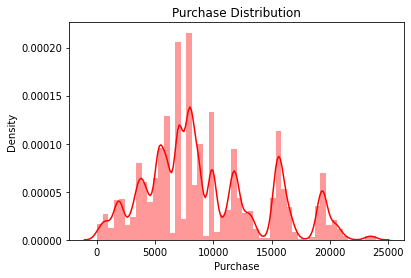

In [98]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


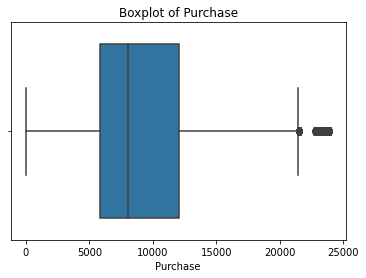

In [99]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [100]:
data["Purchase"].skew()

0.6001400037087128

In [101]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [102]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

### Gender

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


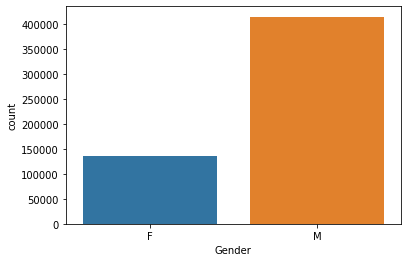

In [103]:
sns.countplot(data['Gender'])
plt.show()

In [104]:
data['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

There are more males than females

In [105]:
data.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

### Marital Status

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


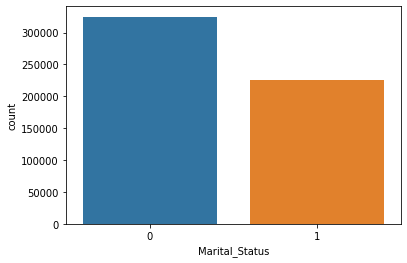

In [106]:
sns.countplot(data['Marital_Status'])
plt.show()

There are more unmarried people in the dataset who purchase more

In [107]:
data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

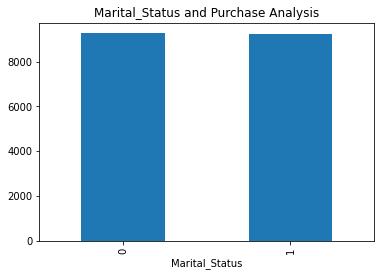

In [108]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

### Occupation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


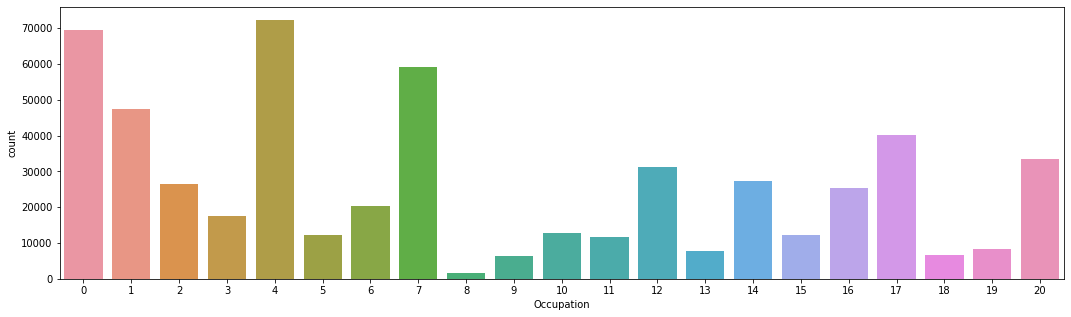

In [109]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [110]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


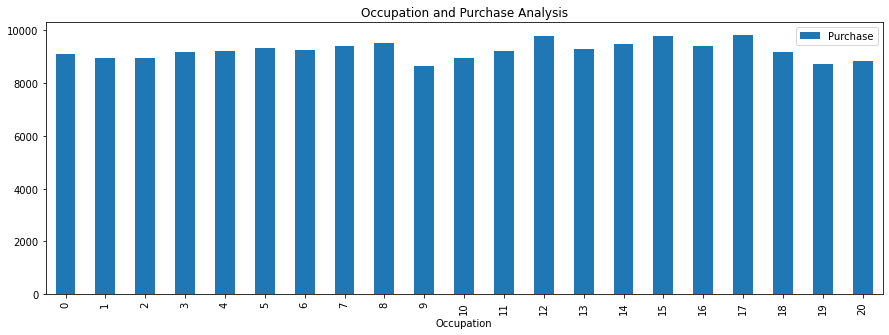

In [111]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

### City_Category

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


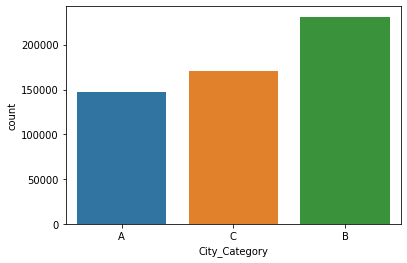

In [112]:
sns.countplot(data['City_Category'])
plt.show()

It is observed that city category B has made the most number of puchases.

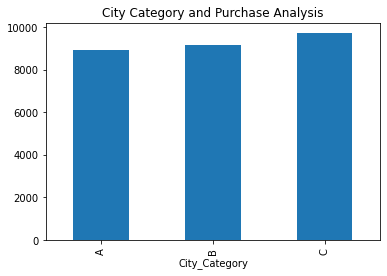

In [113]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

However, the city whose buyers spend the most is city type ‘C’.

### Stay_In_Current_City_Years

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


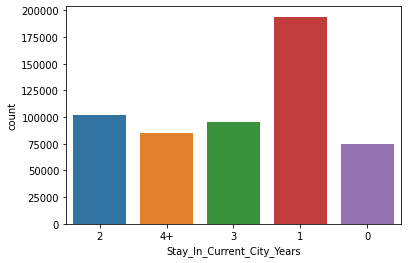

In [114]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

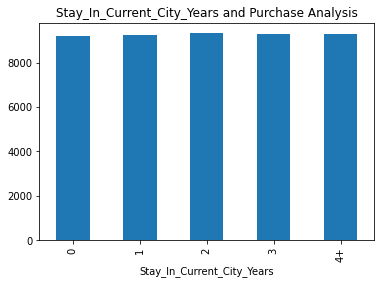

In [115]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

### Age

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


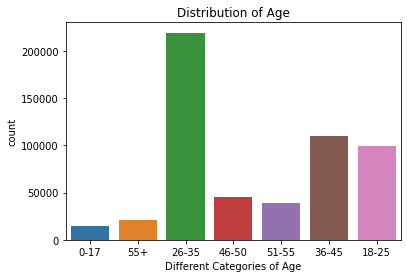

In [116]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

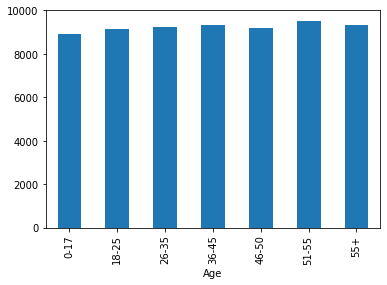

In [117]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

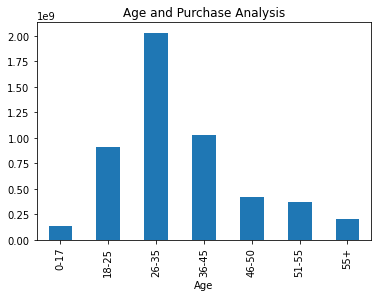

In [118]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

### Product_Category_1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


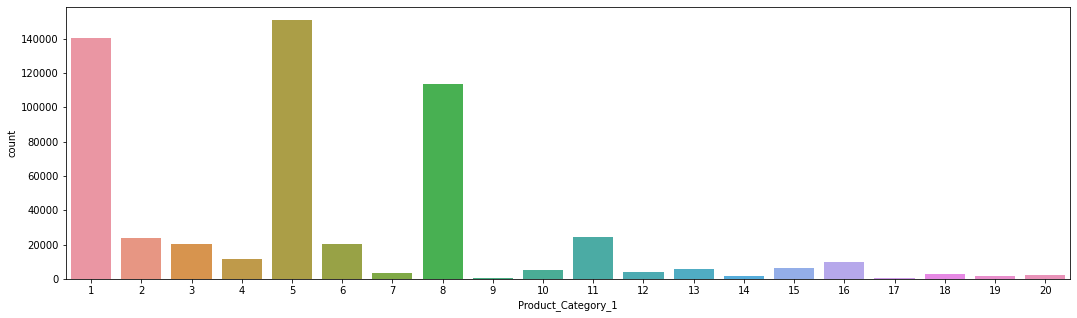

In [119]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

It is clear that `Product_Category_1` numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

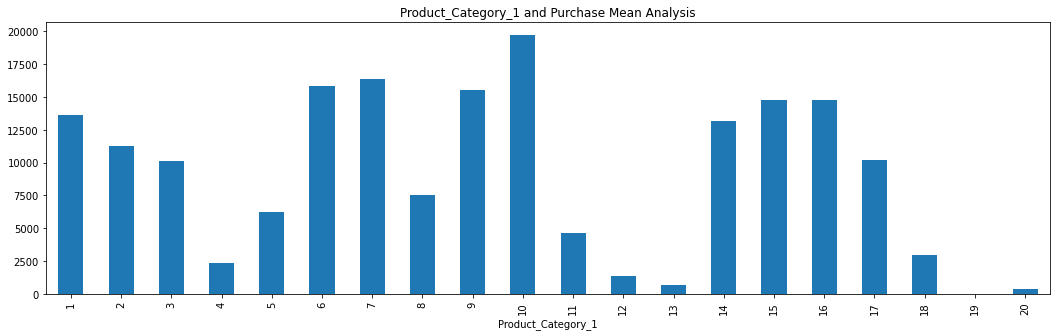

In [120]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

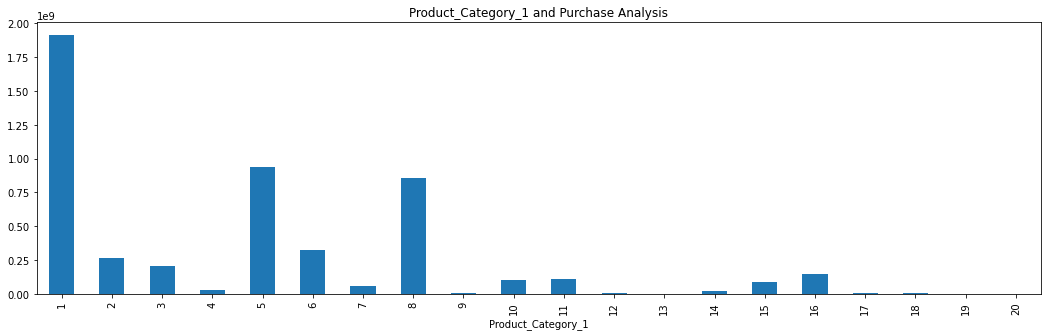

In [121]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

### Product_Category_2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


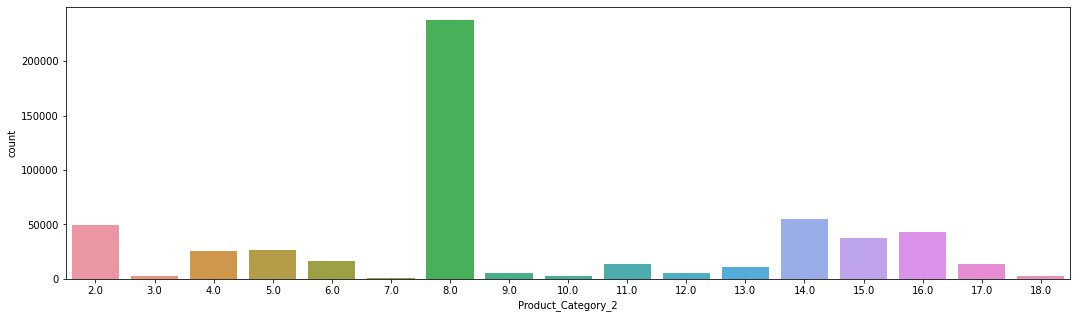

In [122]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()

### Product_Category_3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


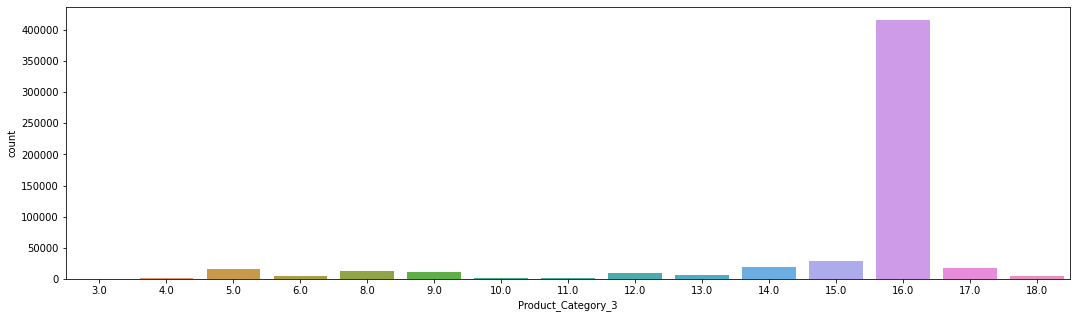

In [123]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [124]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.002065,-0.000186,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.001566,0.000246,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.010260,0.013978,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.279247,0.317944,-0.343703
Product_Category_2,0.002065,0.001566,0.010260,0.279247,1.000000,0.463188,-0.128651
Product_Category_3,-0.000186,0.000246,0.013978,0.317944,0.463188,1.000000,-0.185945
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.128651,-0.185945,1.000000


## HeatMap

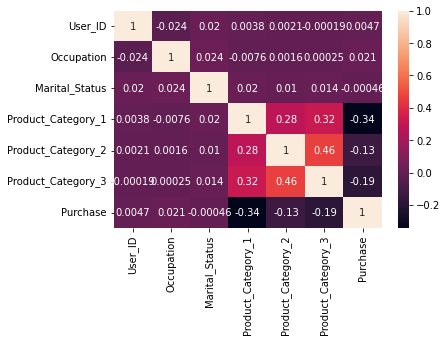

In [125]:
sns.heatmap(data.corr(),annot=True)
plt.show()

There is a some corellation between the product category groups.

In [126]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [127]:
df = data.copy()

In [128]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [129]:
# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [130]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

## Encoding the categorical variables

In [131]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [132]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [133]:
df['Age'] = lr.fit_transform(df['Age'])

In [134]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [135]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,8.0,16.0,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,8.0,16.0,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,16.0,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,8.0,16.0,7969,0,0,0,0,1


In [136]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [137]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int64 
 3   Age                            550068 non-null  int64 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int64 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  uint8 
 12  Stay_In_Current_City_Years_1   550068 non-nu

## Dropping the irrelevant columns

In [139]:
df = df.drop(["User_ID","Product_ID"],axis=1)

## Splitting data into independent and dependent variables

In [140]:
df = df.reset_index()

In [141]:
X = df.drop("Purchase",axis=1)

In [142]:
y=df['Purchase']

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modeling

### Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [146]:
lr.intercept_

12778.116896471693

In [147]:
lr.coef_

array([-2.39366418e-04,  5.15383651e+02,  1.27818016e+02,  5.74313791e+00,
        3.35849188e+02, -6.20090574e+01, -4.02100328e+02, -1.91700718e+00,
       -1.55560847e+02, -1.97869704e+01,  5.20304999e+00,  1.65564638e+01,
       -3.32276132e-01, -1.64026726e+00])

In [148]:
y_pred = lr.predict(X_test)

In [149]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [150]:
mean_absolute_error(y_test, y_pred)

3584.382656939961

In [151]:
mean_squared_error(y_test, y_pred)

21938227.729701508

In [152]:
r2_score(y_test, y_pred)

0.130512545932286

In [153]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4683.826184830251


# DecisionTreeRegressor

In [154]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [155]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [156]:
dt_y_pred = regressor.predict(X_test)

In [157]:
mean_absolute_error(y_test, dt_y_pred)

2842.4426285139466

In [158]:
mean_squared_error(y_test, dt_y_pred)

16440645.739154411

In [159]:
r2_score(y_test, dt_y_pred)

0.3484006373216241

In [160]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  4054.7066156695496


# Random Forest Regressor

In [161]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  

In [162]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [163]:
rf_y_pred = RFregressor.predict(X_test)

In [164]:
mean_absolute_error(y_test, rf_y_pred)

2259.270533810848

In [165]:
mean_squared_error(y_test, rf_y_pred)

9363140.35018057

In [166]:
r2_score(y_test, rf_y_pred)

0.6289065294852806

In [167]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3059.92489289861


# XGBoost Regressor

In [168]:
from xgboost.sklearn import XGBRegressor

In [169]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

[16:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

In [170]:
xgb_y_pred = xgb_reg.predict(X_test)

In [171]:
mean_absolute_error(y_test, xgb_y_pred)

2180.915985257332

In [172]:
mean_squared_error(y_test, xgb_y_pred)

8520922.475504946

In [173]:
r2_score(y_test, xgb_y_pred)

0.6622865219187893

In [174]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2919.0619170385794
